In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Sektor barang konsumen non-primer

In [59]:
data = pd.read_csv('tesla.csv')

# Parse tanggal dan mengatur sebagai indeks
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Mengambil harga penutupan sebagai basis simulasi
closing_prices = data['Close']

data.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-02,0,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,1,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,2,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,3,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,4,14.187333,14.253333,14.000667,14.041333,51637500


Menghitung daily returns

In [60]:
# Menghitung pengembalian harian (daily returns)
daily_returns = closing_prices.pct_change().dropna()

Penjelasan:

- `pct_change()` menghitung persentase perubahan harian pada harga saham.
- `dropna()` digunakan untuk menghapus nilai kosong (yang muncul karena perhitungan perubahan pertama).

Parameter dan Simulasi Random Walk

In [61]:
# Parameter simulasi
num_days = 252  # Jumlah hari perdagangan dalam setahun
num_simulations = 10  # Jumlah skenario simulasi

# Rata-rata dan deviasi standar pengembalian harian
mu = daily_returns.mean()
sigma = daily_returns.std()

**Penjelasan**:

- `num_days`: Jumlah hari perdagangan dalam setahun adalah 252 hari.
- `num_simulations`: Menentukan berapa banyak jalur (skenario) simulasi yang ingin dibuat.
- `mu` dan `sigma`: Rata-rata dan standar deviasi pengembalian harian digunakan untuk menggambarkan distribusi normal dari pergerakan harga.

Simulasi

In [62]:
# Inisialisasi matriks simulasi
simulations = np.zeros((num_days, num_simulations))
initial_price = closing_prices[-1]

# Seed untuk hasil yang sama
np.random.seed(42)

# Melakukan simulasi
for sim in range(num_simulations):
    simulations[0, sim] = initial_price
    for day in range(1, num_days):
        random_shock = np.random.normal(mu, sigma)
        simulations[day, sim] = simulations[day - 1, sim] * (1 + random_shock)


Visualisasi hasil

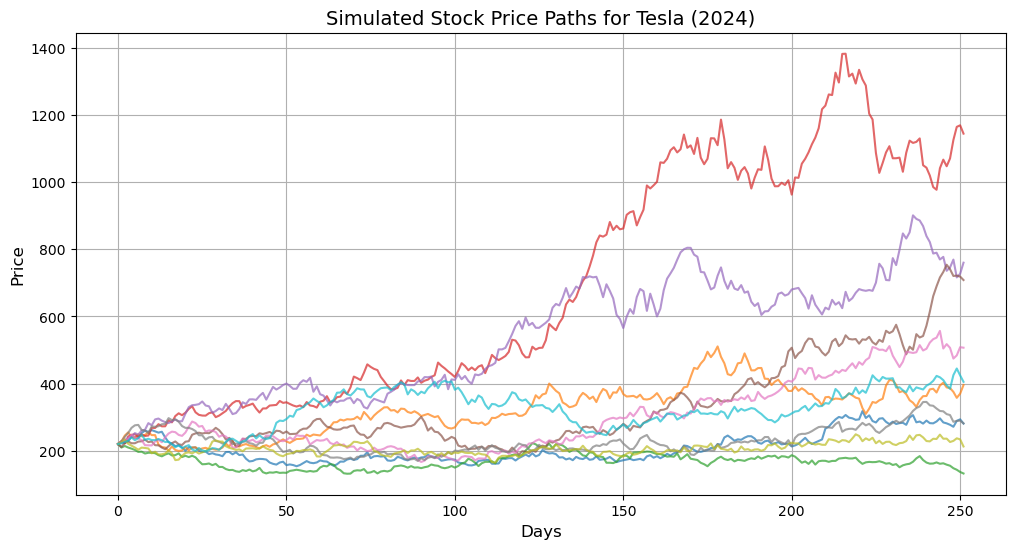

In [63]:
# Plot jalur simulasi
plt.figure(figsize=(12, 6))
for sim in range(num_simulations):
    plt.plot(simulations[:, sim], alpha=0.7)
plt.title('Simulasi Pergerakan Harga Saham untuk Tesla (2024)', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

- Grafik menunjukkan 10 jalur simulasi harga saham Tesla selama 252 hari perdagangan pada tahun 2024.
- Setiap jalur berbeda karena adanya elemen acak dalam simulasi. (random walk)